# TUGAS PENYEIMBANG DATA DENGAN SMOTE DAN ADASYN

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas scikit-learn imbalanced-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


# SMOTE

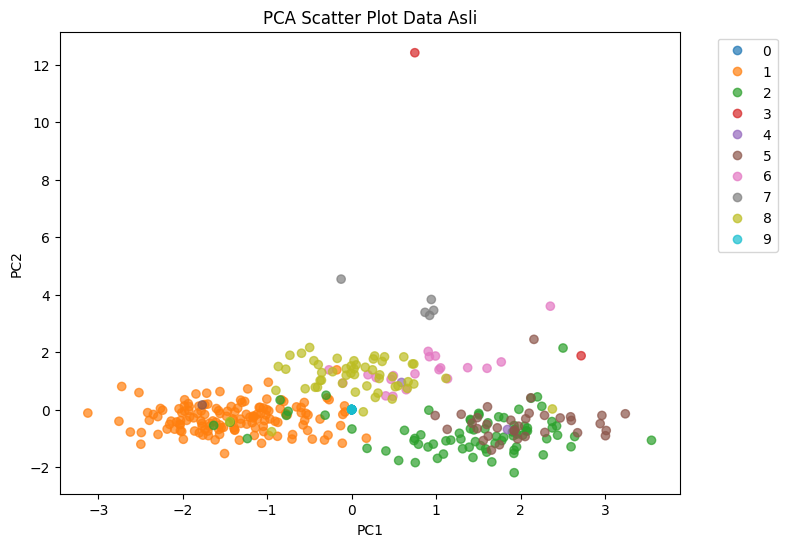

Jumlah data per kelas sebelum SMOTE:
cp                      143
im                       77
pp                       52
imU                      35
om                       20
None                     12
omL                       5
imS                       2
imL                       2
`localization_class`      1
Name: count, dtype: int64


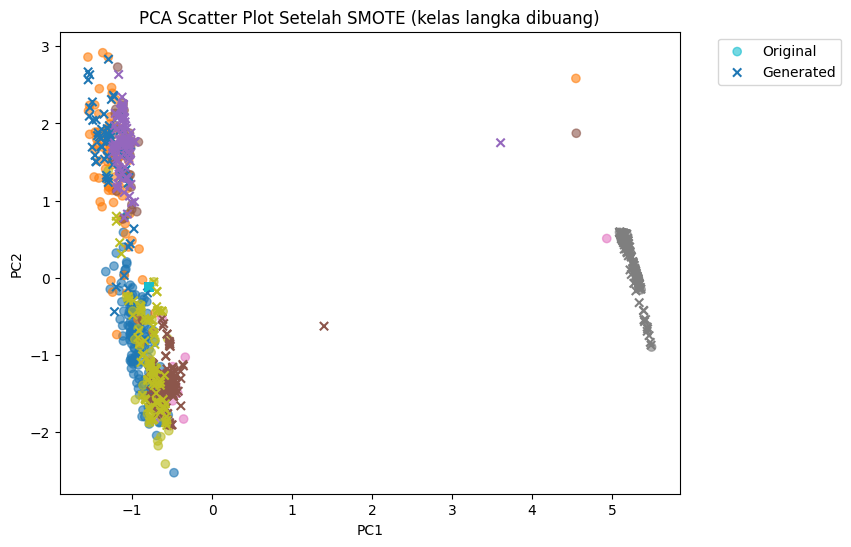


Jumlah data per kelas sesudah SMOTE:
cp      143
im      143
imU     143
om      143
omL     143
pp      143
None    143
Name: count, dtype: int64


In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
import numpy as np

# ======================
# 1. Baca file SQL
# ======================
file_path = r"C:\Users\ThinkPad\OneDrive\Documents\Proyek Sains Data\tugas\Ecoli.sql"
with open(file_path, "r", encoding="utf-8") as f:
    sql_text = f.read()

# ======================
# 2. Parsing baris INSERT
# ======================
pattern = re.findall(r"\(([^)]+)\)", sql_text)

rows = []
for row in pattern:
    parts = [p.strip().strip("'") for p in row.split(",")]
    rows.append(parts)

columns = ["id", "protein_name", "mcg", "gvh", "lip", "chg",
           "aac", "alm1", "alm2", "localization_class"]

df = pd.DataFrame(rows, columns=columns)

# ======================
# 3. Konversi kolom numerik
# ======================
for col in ["mcg","gvh","lip","chg","aac","alm1","alm2"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Encode target class
le = LabelEncoder()
df["label"] = le.fit_transform(df["localization_class"])

# ======================
# 4. Imputasi + Normalisasi
# ======================
X = df[["mcg","gvh","lip","chg","aac","alm1","alm2"]].values
y = df["label"].values

imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ======================
# 5. PCA sebelum balancing
# ======================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", alpha=0.7)
plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("PCA Scatter Plot Data Asli")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# ======================
# 6. Filter kelas langka (≤ 2 sampel)
# ======================
class_counts = pd.Series(y).value_counts()
print("Jumlah data per kelas sebelum SMOTE:")
print(class_counts.rename(index=dict(enumerate(le.classes_))))

valid_classes = class_counts[class_counts > 2].index   # buang kelas langka
mask = np.isin(y, valid_classes)

X_filtered = X_scaled[mask]
y_filtered = y[mask]

# ======================
# 7. Balancing dengan SMOTE
# ======================
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=2)
X_res, y_res = smote.fit_resample(X_filtered, y_filtered)

X_res_pca = pca.fit_transform(X_res)
n_generated = len(X_res) - len(X_filtered)

plt.figure(figsize=(8,6))
plt.scatter(X_res_pca[:-n_generated,0], X_res_pca[:-n_generated,1],
            c=y_res[:-n_generated], cmap="tab10", alpha=0.6, label="Original")
plt.scatter(X_res_pca[-n_generated:,0], X_res_pca[-n_generated:,1],
            c=y_res[-n_generated:], cmap="tab10", marker="x", label="Generated")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("PCA Scatter Plot Setelah SMOTE (kelas langka dibuang)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# ======================
# 8. Distribusi kelas
# ======================
print("\nJumlah data per kelas sesudah SMOTE:")
print(pd.Series(y_res).value_counts().sort_index().rename(index=dict(enumerate(le.classes_))))


# ADASYN

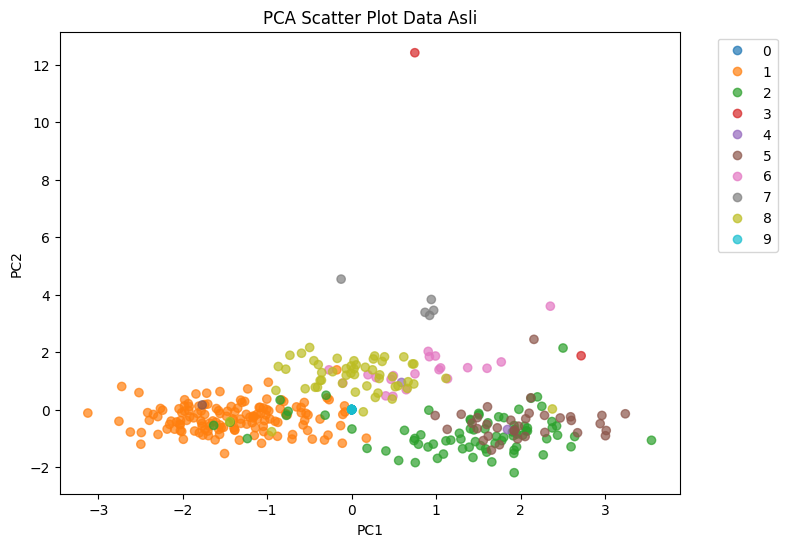

Jumlah data per kelas sebelum ADASYN:
cp                      143
im                       77
pp                       52
imU                      35
om                       20
None                     12
omL                       5
imS                       2
imL                       2
`localization_class`      1
Name: count, dtype: int64

 Mencoba ADASYN dengan n_neighbors=1 ...
 Gagal dengan n_neighbors=1 → Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.

 Mencoba ADASYN dengan n_neighbors=2 ...
 Gagal dengan n_neighbors=2 → Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.

 Mencoba ADASYN dengan n_neighbors=3 ...
 Gagal dengan n_neighbors=3 → Not any neigbours belong to the majority class. This case will induce a NaN case with a divisi

In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
import numpy as np

# ======================
# 1. Baca file SQL
# ======================
file_path = r"C:\Users\ThinkPad\OneDrive\Documents\Proyek Sains Data\tugas\Ecoli.sql"
with open(file_path, "r", encoding="utf-8") as f:
    sql_text = f.read()

# ======================
# 2. Parsing baris INSERT
# ======================
pattern = re.findall(r"\(([^)]+)\)", sql_text)

rows = []
for row in pattern:
    parts = [p.strip().strip("'") for p in row.split(",")]
    rows.append(parts)

columns = ["id", "protein_name", "mcg", "gvh", "lip", "chg",
           "aac", "alm1", "alm2", "localization_class"]

df = pd.DataFrame(rows, columns=columns)

# ======================
# 3. Konversi kolom numerik
# ======================
for col in ["mcg","gvh","lip","chg","aac","alm1","alm2"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Encode target class
le = LabelEncoder()
df["label"] = le.fit_transform(df["localization_class"])

# ======================
# 4. Imputasi + Normalisasi
# ======================
X = df[["mcg","gvh","lip","chg","aac","alm1","alm2"]].values
y = df["label"].values

imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ======================
# 5. PCA sebelum balancing
# ======================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", alpha=0.7)
plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("PCA Scatter Plot Data Asli")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# ======================
# 6. Filter kelas langka (≤ 2 sampel)
# ======================
class_counts = pd.Series(y).value_counts()
print("Jumlah data per kelas sebelum ADASYN:")
print(class_counts.rename(index=dict(enumerate(le.classes_))))

valid_classes = class_counts[class_counts > 2].index   # buang kelas langka
mask = np.isin(y, valid_classes)

X_filtered = X_scaled[mask]
y_filtered = y[mask]

# ======================
# 7. Coba ADASYN dengan perulangan n_neighbors
# ======================
X_res, y_res = None, None  # variabel untuk simpan hasil sukses

for k in range(1, 6):   # coba dari 1 sampai 5
    try:
        print(f"\n Mencoba ADASYN dengan n_neighbors={k} ...")
        adasyn = ADASYN(random_state=42, n_neighbors=k)
        X_tmp, y_tmp = adasyn.fit_resample(X_filtered, y_filtered)

        print(f"✔ Berhasil dengan n_neighbors={k}")
        print("Jumlah data per kelas setelah resampling:")
        print(pd.Series(y_tmp).value_counts().sort_index().rename(index=dict(enumerate(le.classes_))))

        # simpan hasil dari percobaan terakhir yang berhasil
        X_res, y_res = X_tmp, y_tmp

        # plot PCA hasil balancing
        X_res_pca = pca.fit_transform(X_res)
        n_generated = len(X_res) - len(X_filtered)

        plt.figure(figsize=(8,6))
        plt.scatter(X_res_pca[:-n_generated,0], X_res_pca[:-n_generated,1],
                    c=y_res[:-n_generated], cmap="tab10", alpha=0.6, label="Original")
        plt.scatter(X_res_pca[-n_generated:,0], X_res_pca[-n_generated:,1],
                    c=y_res[-n_generated:], cmap="tab10", marker="x", label="Generated")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title(f"PCA Scatter Plot Setelah ADASYN (n_neighbors={k})")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.show()

    except Exception as e:
        print(f" Gagal dengan n_neighbors={k} → {e}")

# ======================
# 8. Jika ada hasil terakhir yang berhasil
# ======================
if X_res is not None:
    print("\nJumlah data per kelas dari hasil terakhir ADASYN:")
    print(pd.Series(y_res).value_counts().sort_index().rename(index=dict(enumerate(le.classes_))))
else:
    print("\nTidak ada nilai n_neighbors yang berhasil untuk dataset ini.")
